In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from decimal import Decimal

from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.utils import shuffle
from sklearn.utils import check_random_state
from sklearn import metrics
from scipy.spatial.distance import cdist

random_state = np.random.RandomState(0)
df=pd.read_csv('input.csv', sep=',',header=None)
#print(df.values)
for i in range(len(df)):
    tempX = df[0][i]
    tempY = df[1][i]
    X.append([tempX,tempY])


1  112640163.463
2  0.235812984896
3  0.440443673729
4  0.791078302668
5  0.391537918783
6  0.487289363317
7  1.01361327165e-08
8  0.937430767721
9  0.945889590173
Found 7 objects


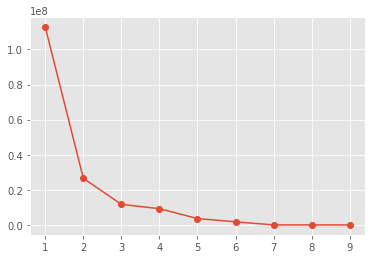

In [62]:
cluster_range = range( 1, 10 )
cluster_errors = []

previous_error = 1;
ind = 1;
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( df )
    print(str(ind) + "  " + str(clusters.inertia_/previous_error))
    if clusters.inertia_/previous_error < 0.01:
        k=ind
    previous_error = clusters.inertia_
    cluster_errors.append( clusters.inertia_ )
    ind = ind+1
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

print("Found " + str(k) + " objects")

[[ 1508.99932167   447.99852029   352.00312863   691.99948825]
 [ 2876.00087705   452.99885173   361.99794194   668.0005663 ]
 [  209.15744759   443.04996594   397.89242165   669.87098449]
 [ 2450.98924337   428.14390971   345.09708906   713.73349922]
 [ 1063.1082175    435.08637678   347.02896188   647.91448097]
 [ 1999.00103731   499.50072861   364.00033834   652.99913963]
 [  645.9997554    460.99740839   356.00043628   622.00056645]]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


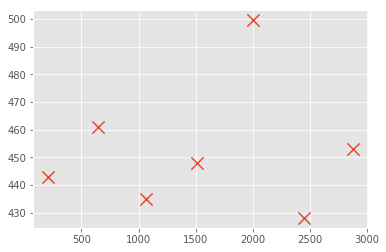

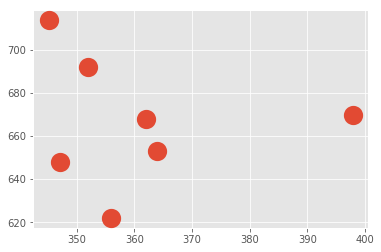

In [64]:

kmeans = MiniBatchKMeans(n_clusters=7, init='random', n_init=1,
                     random_state=random_state).fit(df)

centroid = kmeans.cluster_centers_
labels = kmeans.labels_
print (centroid)
print(labels)
#print(len(df.values))
colors = ["g.","r.","c."]

plt.scatter(centroid[:,0],centroid[:,1], marker = "x", s=150, linewidths = 7, zorder =10)
plt.show()

plt.scatter(centroid[:,2],centroid[:,3], marker = "o", s=150, linewidths = 7, zorder =10)
plt.show()



In [67]:
f = open("output.xml", "w")
f.write("<annotation><filename>img2.jpg</filename><folder>example_folder</folder><source><sourceImage>The MIT-CSAIL database of objects and scenes</sourceImage><sourceAnnotation>LabelMe Webtool</sourceAnnotation></source>")
objIndex=0
for result in centroid:
    centerX = result[0]
    centerY = result[1]
    width = result[2]
    height = result[3]
    f.write("<object><name>obj"+str(objIndex)+"</name><deleted>0</deleted><verified>0</verified><occluded>no</occluded><attributes></attributes><parts><hasparts></hasparts><ispartof></ispartof></parts><date>10-Aug-2018 20:35:51</date><id>"+str(objIndex)+"</id><type>bounding_box</type><polygon><username>anonymous</username>")
    for x in range(4):
        if x==0:
            newX = centerX - width/2
            newY = centerY - height/2
        elif x==1:
            newX = centerX + width/2
            newY = centerY - height/2
        elif x==2:
            newX = centerX + width/2
            newY = centerY + height/2
        elif x==3:
            newX = centerX - width/2
            newY = centerY + height/2
        f.write("<pt><x>"+str(newX)+"</x><y>"+str(newY)+"</y></pt>")
    f.write("</polygon></object>")
    objIndex = objIndex+1
f.write("<imagesize><nrows></nrows><ncols></ncols></imagesize></annotation>")

print("generated the XML of clustered object, output.xml")
print("upload output.xml to LabelMe to view the final result")

generated the XML of clustered object, output.xml
upload output.xml to LabelMe to view the final result
